In [87]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
                            confusion_matrix, 
                            f1_score,
                            accuracy_score,
                            precision_score,
                            recall_score
                            )
warnings.filterwarnings('ignore')

## Intro to Logist Regression

### 📈 Sigmoid Function

The **sigmoid function** is used to map any real-valued number into the range (0, 1). It’s commonly used in logistic regression and neural networks.

#### Formula:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

#### Derivative:
$$
\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$

#### Properties:
- Output range: \( (0, 1) \)
- Smooth and differentiable
- S-shaped curve
- Centered at \( x = 0 \): \( \sigma(0) = 0.5 \)

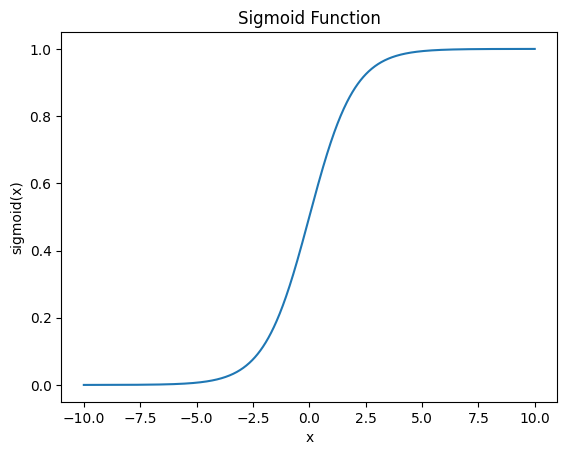

In [88]:
def sigmoid_values(x):
    return 1/(1+np.exp(-x))

X_linespace = np.linspace(-10,10,1000)
Y_hat = sigmoid_values(X_linespace)

plt.plot(X_linespace,Y_hat)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()

# Dataset load from artifacts

In [89]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']


## Train Model


In [90]:
model_lr = LogisticRegression(
    random_state=42,
    max_iter=1000
)

model_lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [91]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)  # Note: should be X_test, not Y_train

In [92]:
Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [93]:
Y_hat_train

array([0, 0, 0, ..., 1, 1, 0], shape=(12668,))

In [94]:
Y_proba_train

array([[0.83847577, 0.16152423],
       [0.88374677, 0.11625323],
       [0.71584462, 0.28415538],
       ...,
       [0.42256852, 0.57743148],
       [0.33921789, 0.66078211],
       [0.73376171, 0.26623829]], shape=(12668, 2))

### Metric Definitions:
- **Accuracy**: Overall correctness of the model
- **Precision**: True Positives / (True Positives + False Positives)
- **Recall**: True Positives / (True Positives + False Negatives)
- **F1-Score**: Harmonic mean of Precision and Recall

In [95]:
accuracy = accuracy_score(Y_test,Y_hat_test)
precision = precision_score(Y_test,Y_hat_test)
recall = recall_score(Y_test,Y_hat_test)
f1 = f1_score(Y_test,Y_hat_test)

# Print all metrics with markdown formatting
print("-- Model Performance Metrics ")

print(f"** Accuracy \t{accuracy:.4f}")
print(f"** Precision \t{precision:.4f}")
print(f"** Recall \t{recall:.4f}")
print(f"** F1-Score \t{f1:.4f}")


-- Model Performance Metrics 
** Accuracy 	0.6948
** Precision 	0.3423
** Recall 	0.6755
** F1-Score 	0.4544


Text(0.5, 1.0, 'Heat Map')

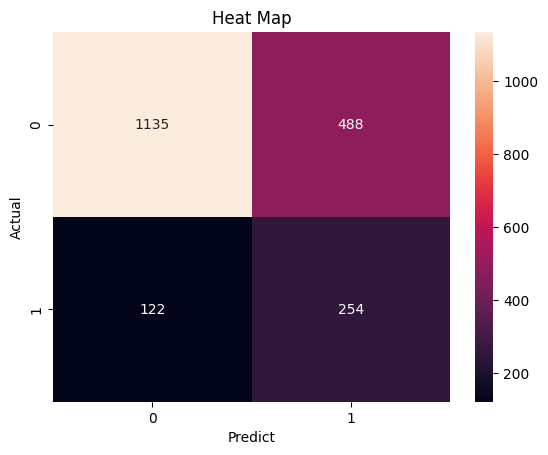

In [101]:
cm = confusion_matrix(Y_test,Y_hat_test)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Heat Map')